## Advance Regression Assignment

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Goals

1. Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
2. Which variables are significant in predicting the price of a house.
3. How well those variables describe the price of a house.
4. Determine the optimal value of lambda for ridge and lasso regression.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid", font_scale=1.2)

import warnings
# regular epxression
import re

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV,KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

# supress warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


### Understanding Data

In [2]:
df = pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
pd.set_option('display.max_rows', None)

## checking for null values
#df.isnull().sum()

# percentage of missing values
#round(100*(df.isnull().sum()/len(df.index)), 2)
df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['colsMissingValues'])
df_missing.sort_values(by=['colsMissingValues'], ascending=False).head(40)


,colsMissingValues
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [5]:
## find columns with with only one unique value
## this won't help with model and analysis

df_unique=pd.DataFrame(df.nunique(), columns=['uniqueValues'])
df_unique.sort_values(by=['uniqueValues'], ascending=True).head(50)


,uniqueValues
CentralAir,2
Utilities,2
Street,2
Alley,2
BsmtHalfBath,3
LandSlope,3
GarageFinish,3
HalfBath,3
PavedDrive,3
PoolQC,3


### Data Cleaning
  1. Where necessary instead of dropping null values we impute them as per domain understanding.
  2. Create dervied variables
  3. Drop unnecessary columns 

In [6]:
# 96% values in column 'MiscFeature' has null values, so we drop it
## drop col Id as it's not useful
df= df.drop(['Id','MiscFeature'], axis=1)


In [7]:
## Impute null values as per domain knowledge

## NA in Alley means 'No Alley'.
df['Alley'].fillna('No Alley', inplace=True)

In [8]:

df['MasVnrType'].fillna('None', inplace=True) 

## for area fill zero where null
df['MasVnrArea'].fillna(0, inplace=True) 
df['LotFrontage'].fillna(0, inplace=True) 


In [9]:
#NA in column 'PoolQC' means No Pool.
df['PoolQC'].fillna('No Pool', inplace=True) 

In [10]:
#NA in column 'Fence' means No Fence.

df['Fence'].fillna('No Fence', inplace=True) 

In [11]:
#NA in 'FireplaceQu' means No Fireplace.
df['FireplaceQu'].fillna('No Fireplace', inplace=True)


In [12]:
#NA in columns ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual'] means No Garage.

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col].fillna('No Garage',inplace=True)


In [13]:
#NA in columns ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'] means No Basement.

for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    df[col].fillna('No Basement', inplace=True)

In [14]:
df['Electrical'].fillna("Other",inplace=True)

In [15]:
df['GarageYrBlt'].fillna(0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
## checking for null values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

#### Create Derived Variables

In [18]:
# Create derived variables
# Converting dates (YearBuilt, YearRemodAdd, HouseAgeSoldYears) 
# to days (houseAgeYears, houseRemodAgeYears, HouseAgeSoldYears) from today

df['HouseAgeYears'] = pd.datetime.now().year - df['YearBuilt']
df['HouseRemodAgeYears'] = pd.datetime.now().year - df['YearRemodAdd']
df['HouseAgeSoldYears'] = pd.datetime.now().year - df['YrSold']



### Business Metrics
 1. Rate per squarefeet.
 2. Ratio of length and width of lot.

In [19]:
# Price per squarefeet.

df.loc[:,'PriceperSft'] = df['LotArea']/df['SalePrice']

# Ratio of length and width of lot.

df.loc[:, 'LWRatio'] = df['LotFrontage']/(df['LotArea']/df['LotFrontage'])

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAgeYears,HouseRemodAgeYears,HouseAgeSoldYears,PriceperSft,LWRatio
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,19,19,14,0.040528,0.500000
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,46,46,15,0.052893,0.666667
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,21,20,14,0.050336,0.411022
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,107,52,16,0.068214,0.376963
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,22,22,14,0.057040,0.494811


In [20]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1

df['Street'] = df['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [21]:
# converting from int to object type to make them categorical variables

df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')
df['MSSubClass'] = df['MSSubClass'].astype('object')
#df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
#df['FullBath'] = df['FullBath'].astype('object')

df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')


In [22]:
## Segregate numeric and categorical fields for data analysis

# numeric
df_numeric = df.select_dtypes(include = ['int64','float64'])
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'HouseAgeYears', 'HouseRemodAgeYears', 'HouseAgeSoldYears',
       'PriceperSft', 'LWRatio'],
      dtype='object')

In [23]:
# categorical
df_categorical = df.select_dtypes(include = ['object'])
df_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

### EDA

#### Categorical Variables vs SalePrice

In [24]:
df_cat_columns = df_categorical.columns

<Figure size 432x288 with 0 Axes>

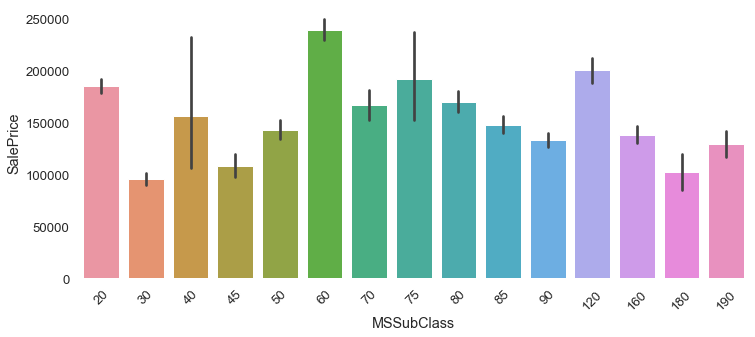

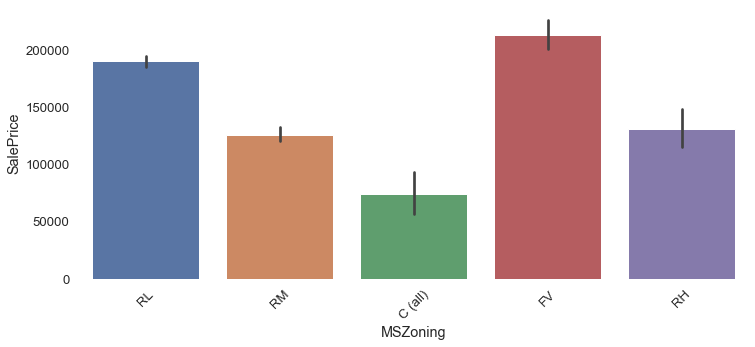

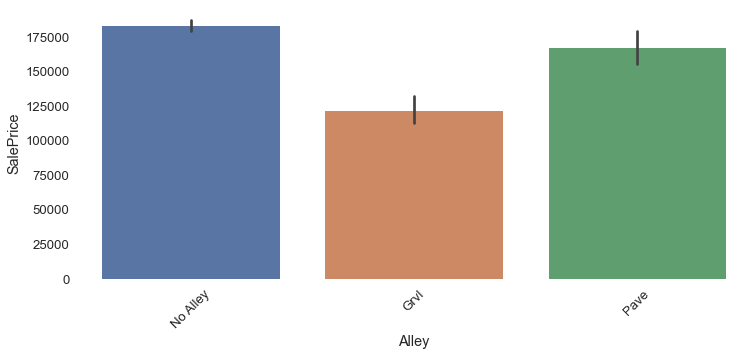

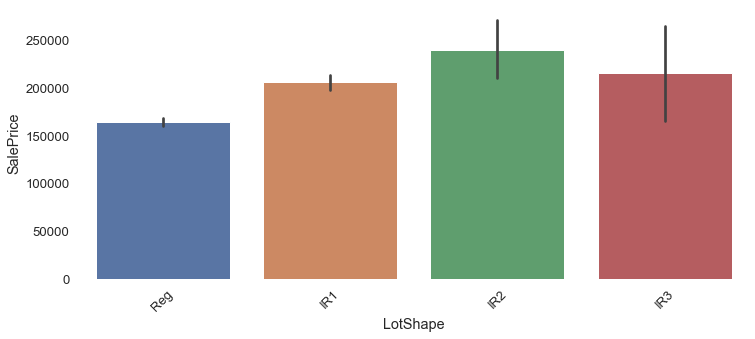

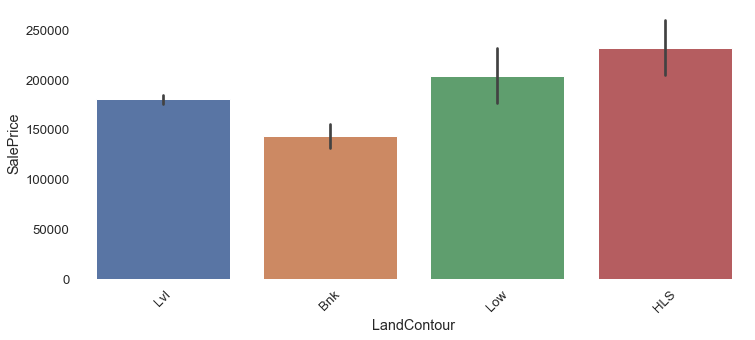

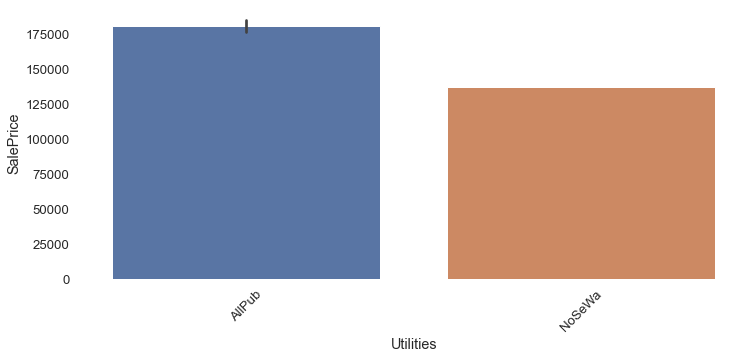

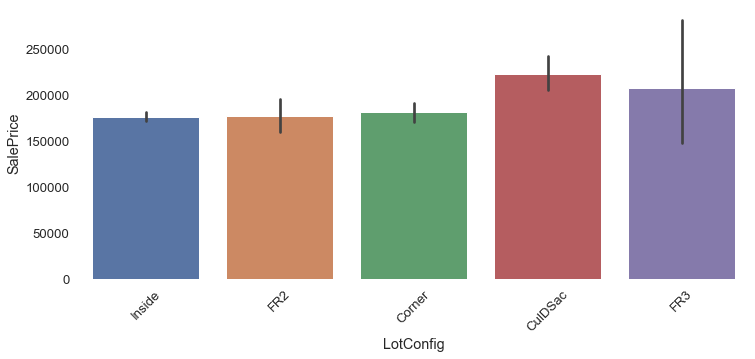

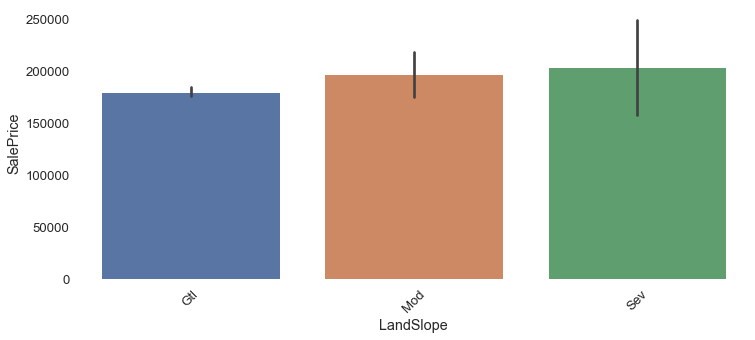

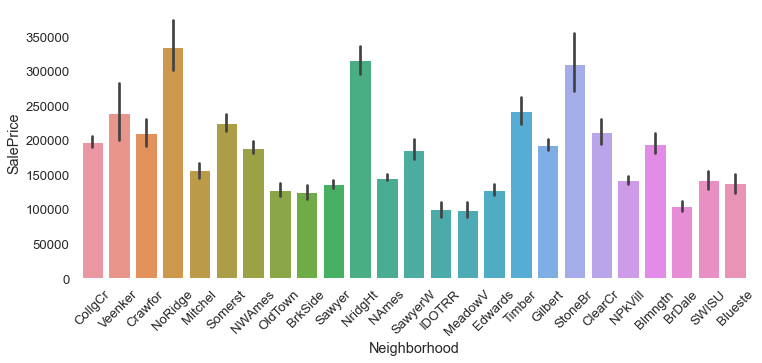

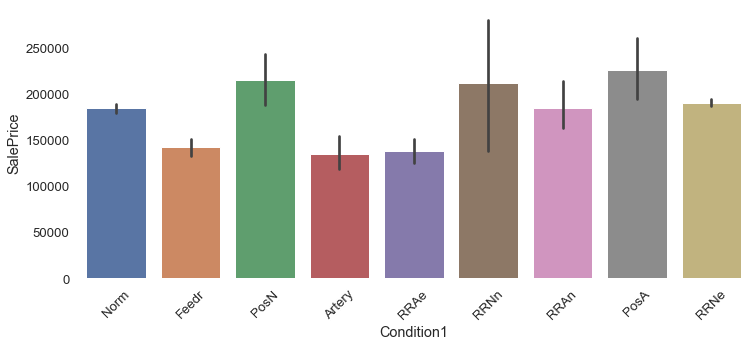

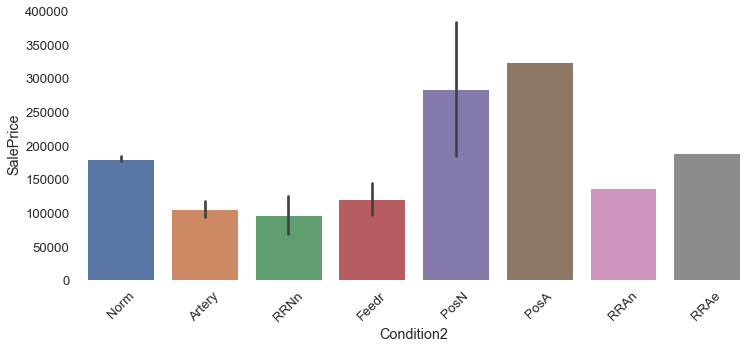

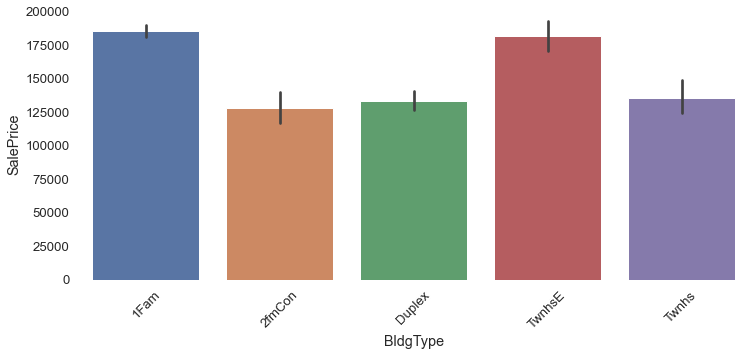

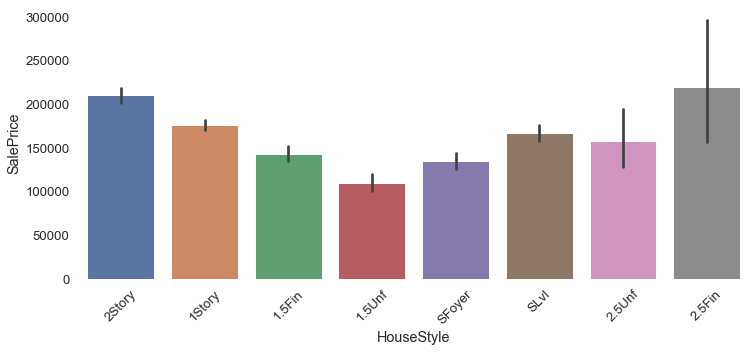

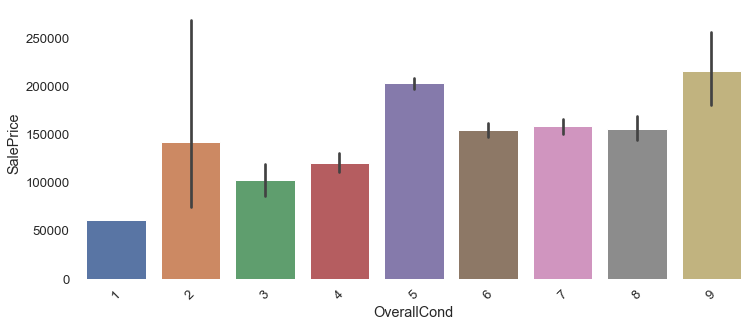

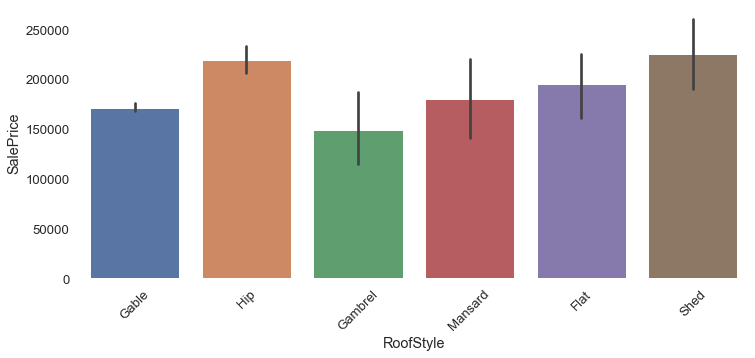

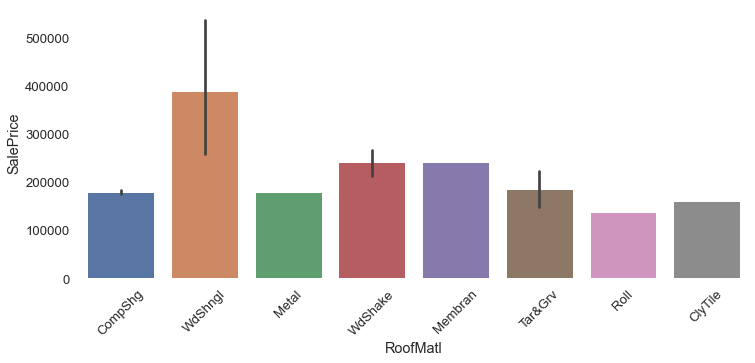

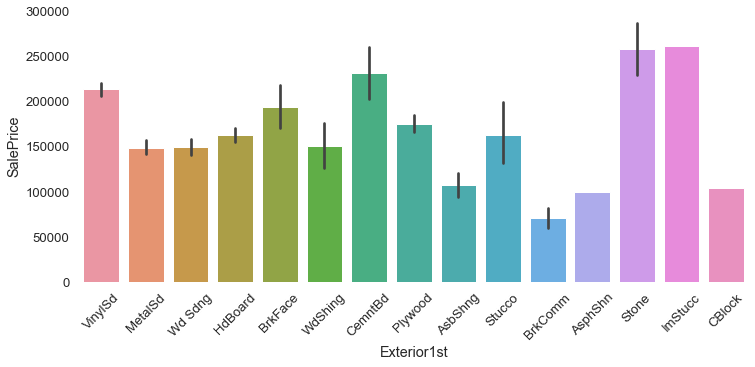

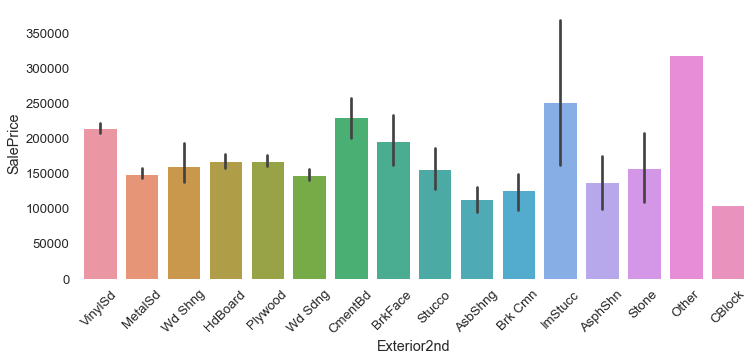

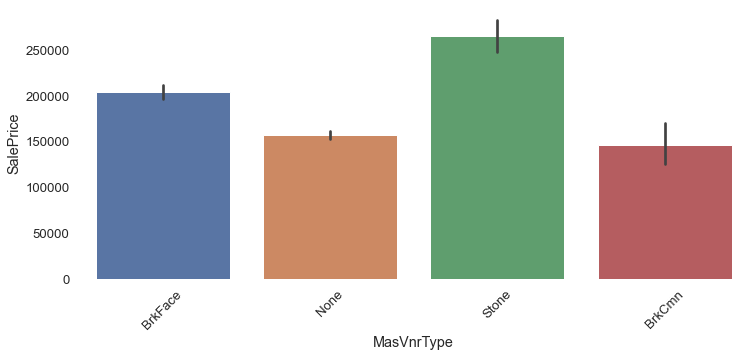

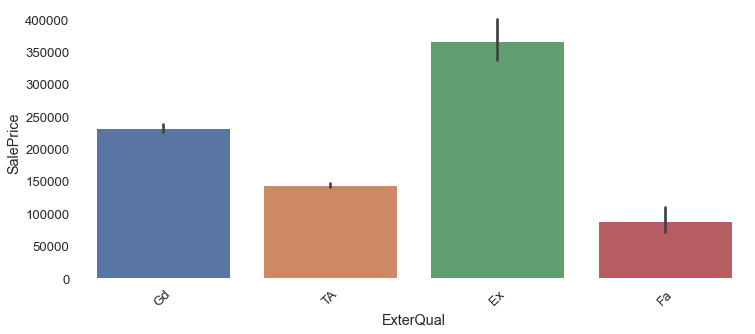

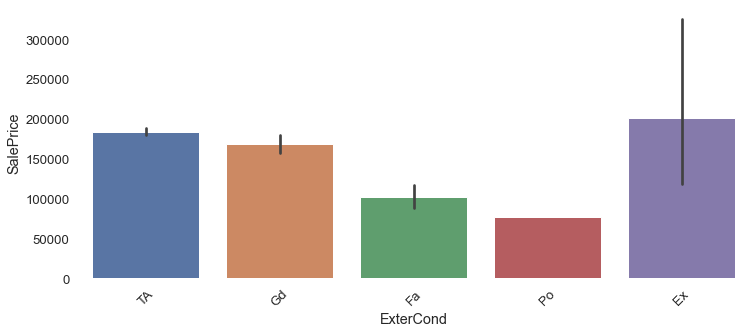

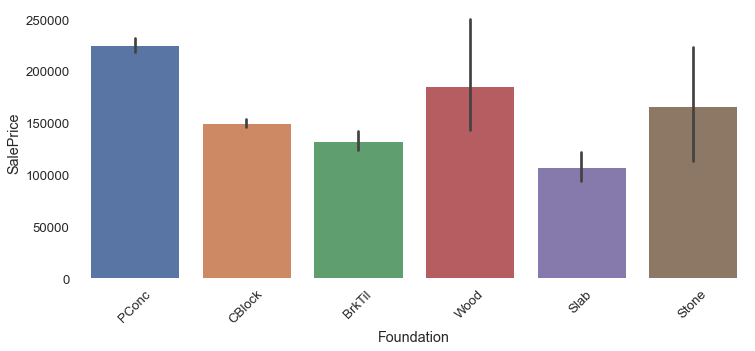

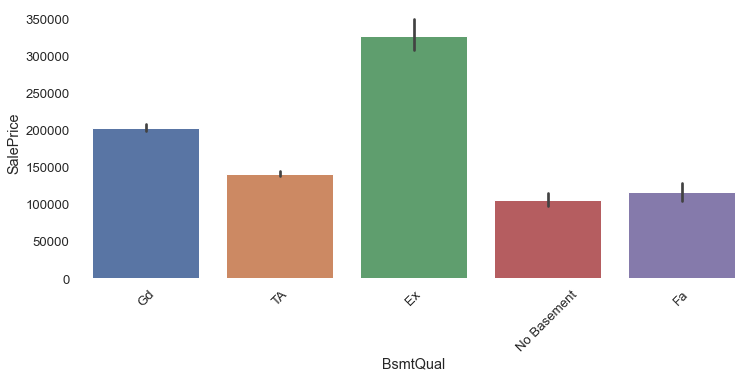

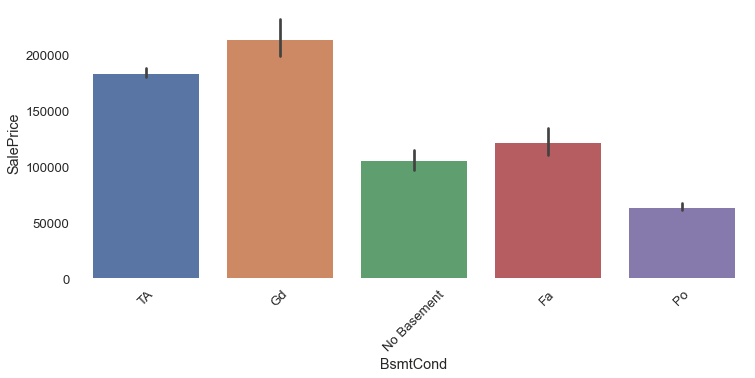

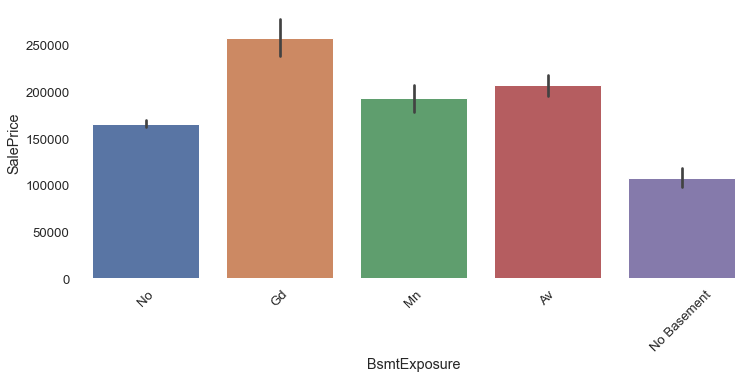

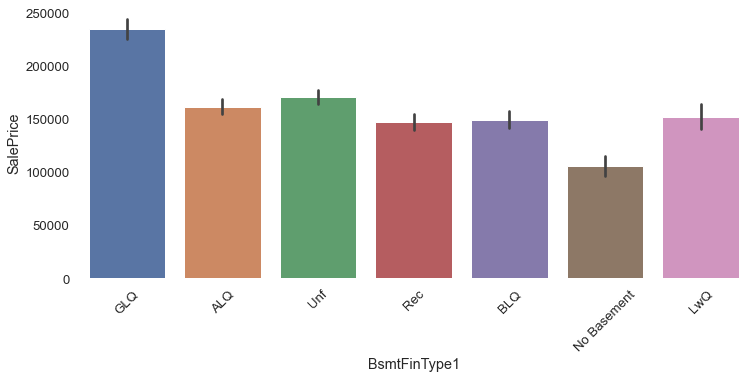

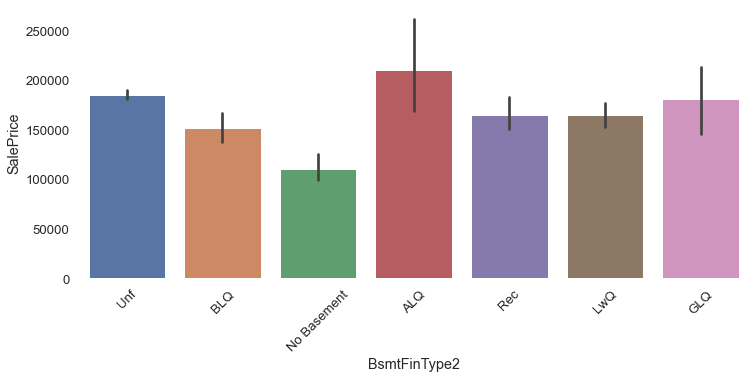

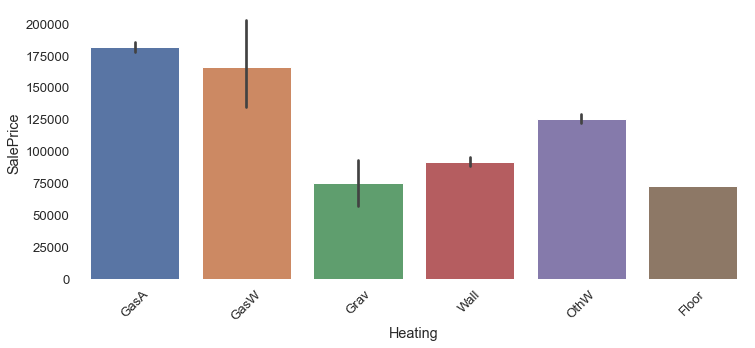

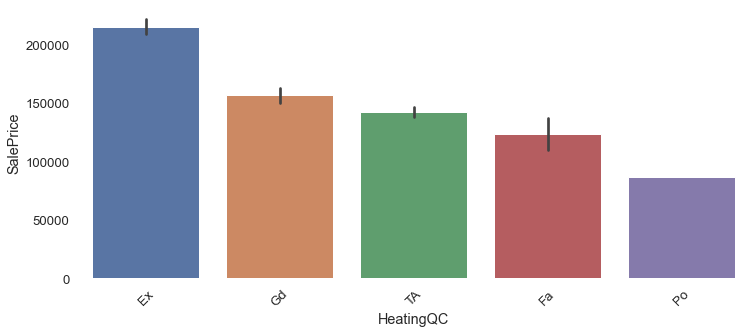

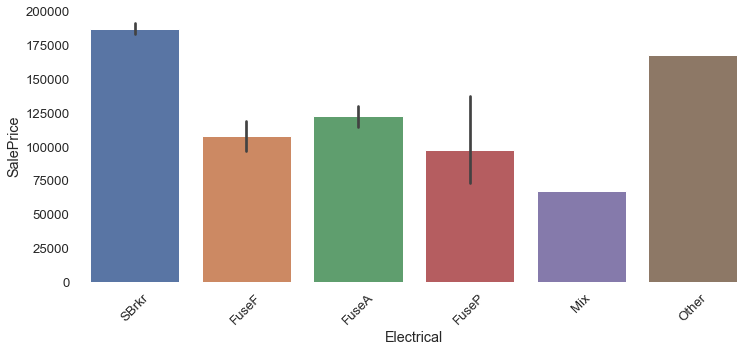

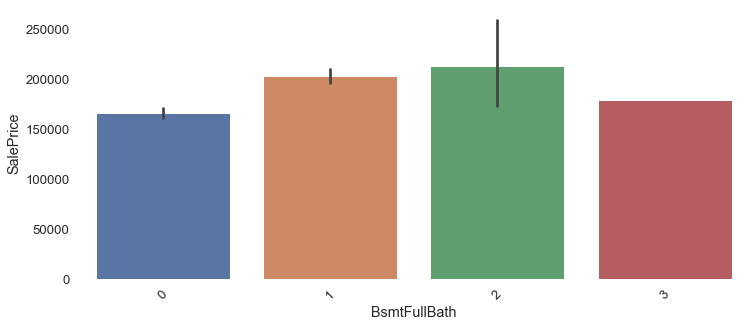

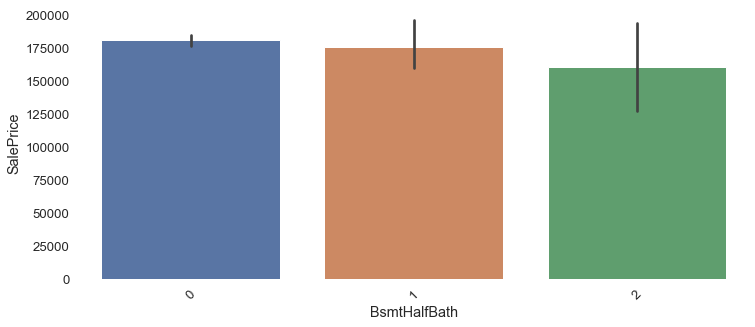

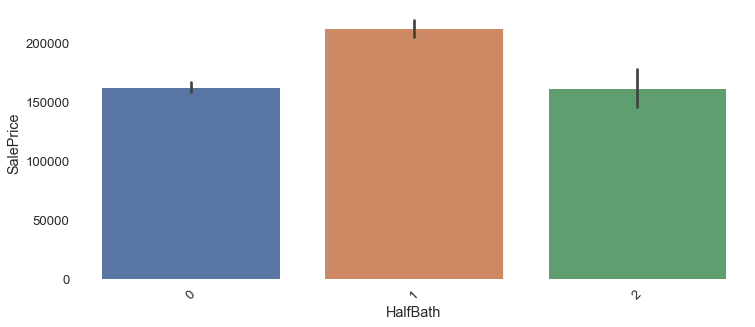

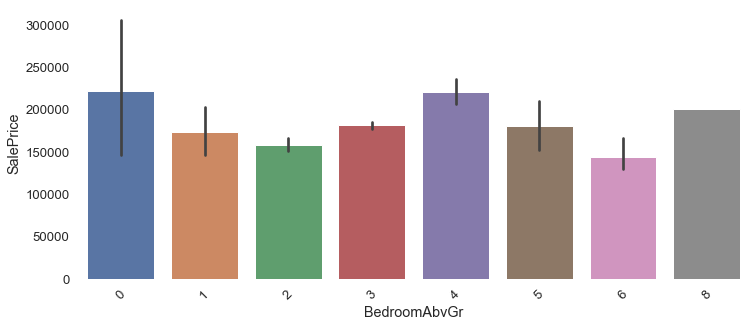

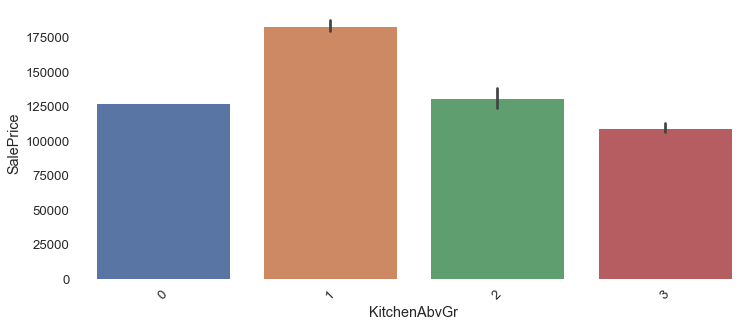

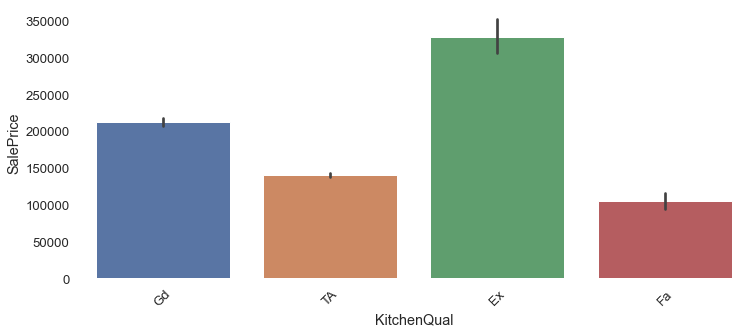

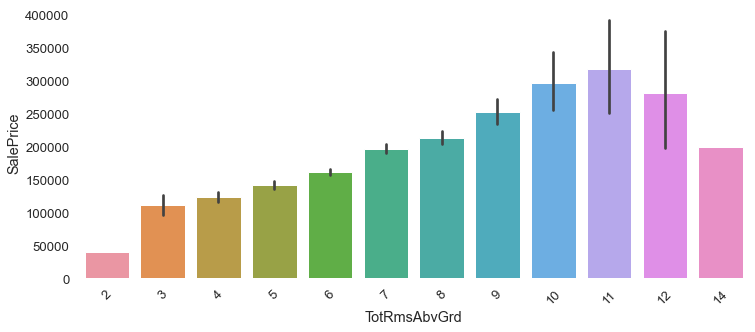

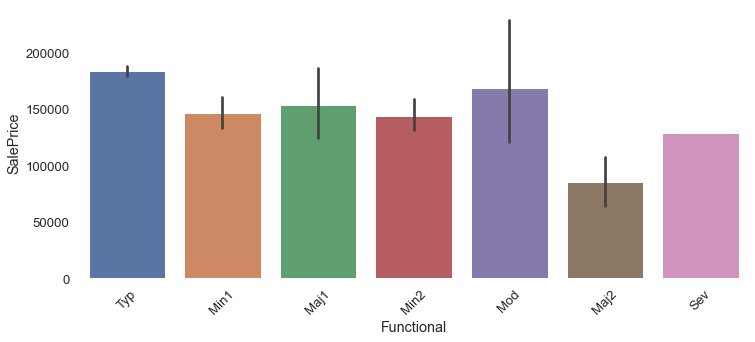

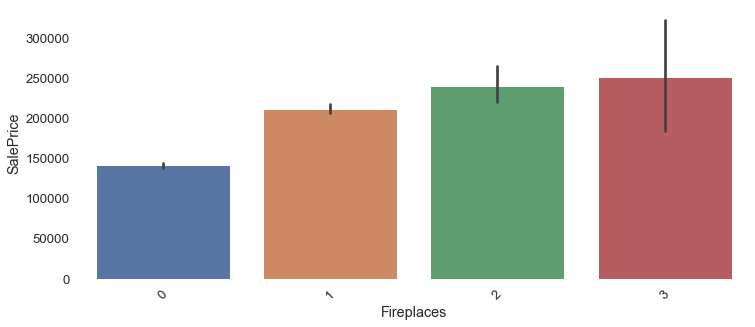

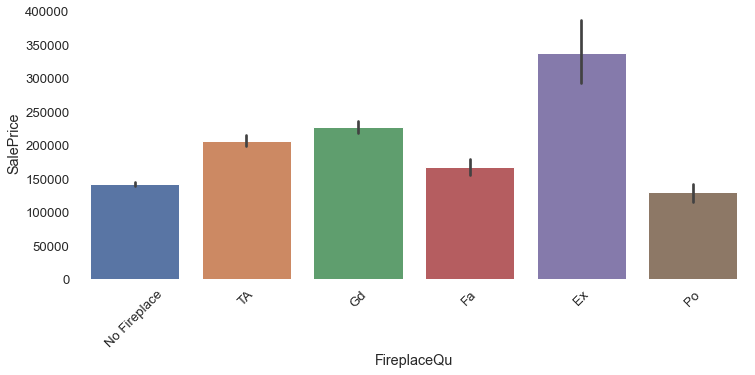

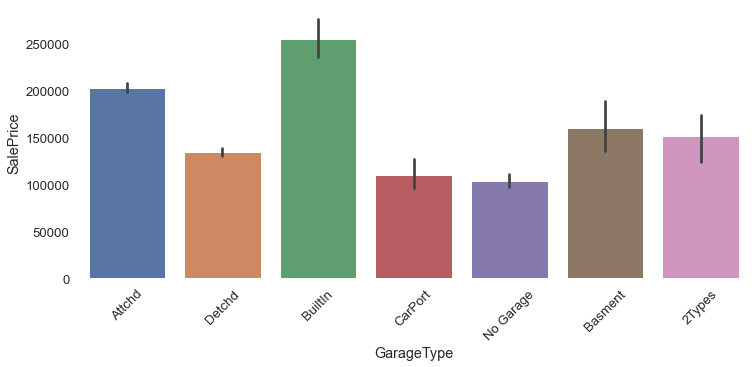

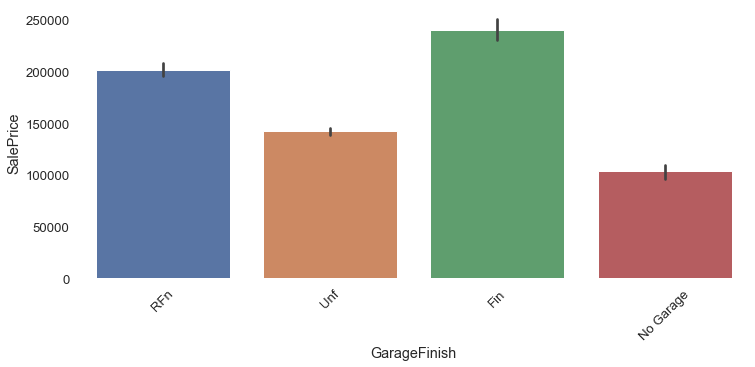

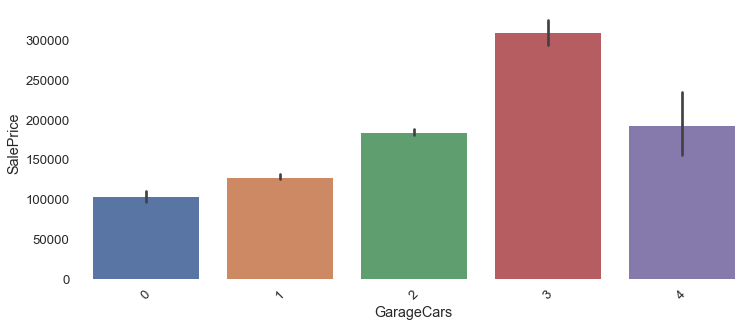

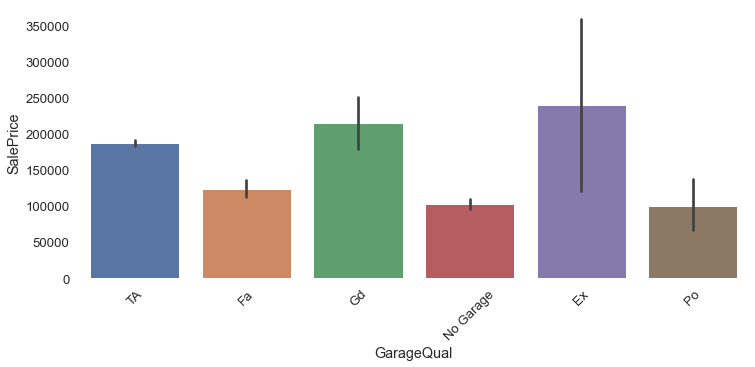

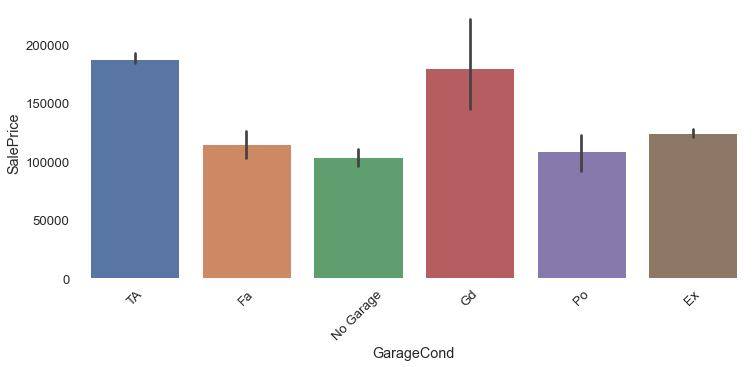

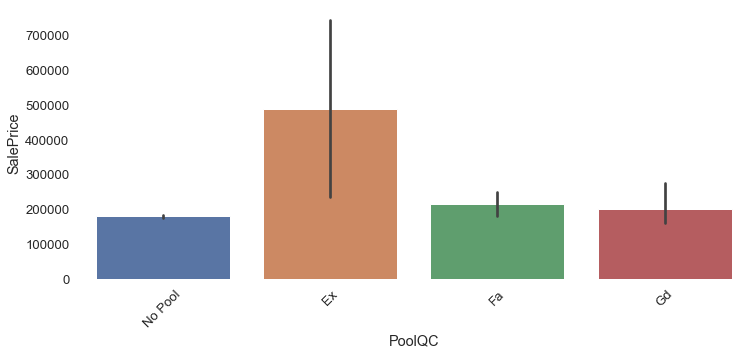

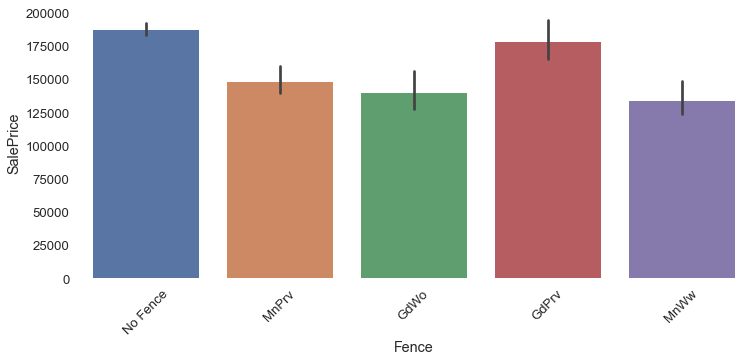

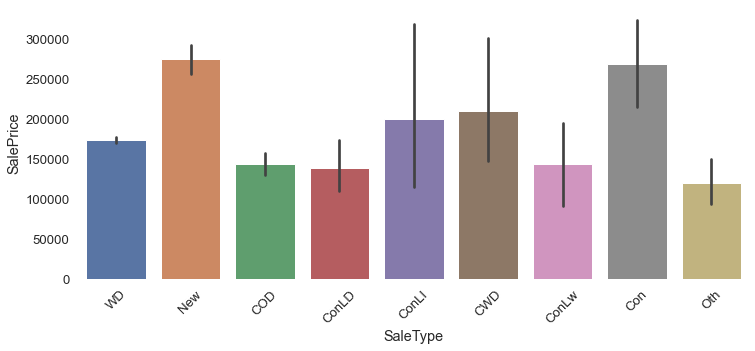

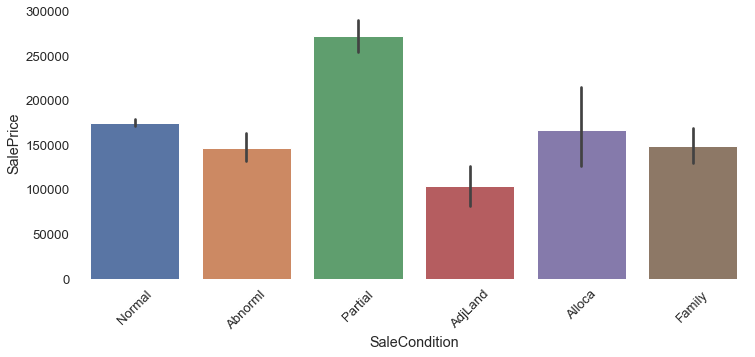

In [25]:
sns.despine(left=True, right=True, bottom=True, top=True)

for i in range(len(df_cat_columns)):
  x = df[df_cat_columns[i]]
  y = df['SalePrice']
  plt.figure(figsize = (12,5))
  plt.xticks(rotation = 45)

  sns.barplot(x=x,y=y,data = df)
  plt.box(False) 

    

### Observation
   #### Sale Price is higher for following features:
    1.  Building with - 2-STORY 1946 & NEWER
    2.  Floating Village Residential
    3.  Hillside - Significant slope from side to side
    4.  All public Utilities (E,G,W,& S)	
    5.  Neighbourhood Northridge or Northridge Heights or Stone Brook
    6.  Location Within 200' of North-South Railroad  OR Near positive off-site feature--park, greenbelt, etc. OR Adjacent to postive off-site feature
    7.  Housestyle is Two storey OR Two and one-half story: 2nd level finished
    8.  Excellent quality exterior, basement, heating, kitchen and fireplace.
    9.  Roof type Shed or Hip with Wood Shingles
    10. Exterior Stone or Imitation Stucco
    11. Masonry veneer type Stone
    12. Excellent exterior material quality
    13. Foundation Poured Concrete
    14. Excellent basement quality
    15. basement finished area - Good Living Quarters
    16. Type of heating : Gas forced warm air furnace OR Gas hot water or steam heat
    17. High Number of fireplaces 
    18. Garage Built-In (Garage part of house - typically has room above garage)
    19. Partially built house.
    

### correlation between numerical variables

<AxesSubplot:>

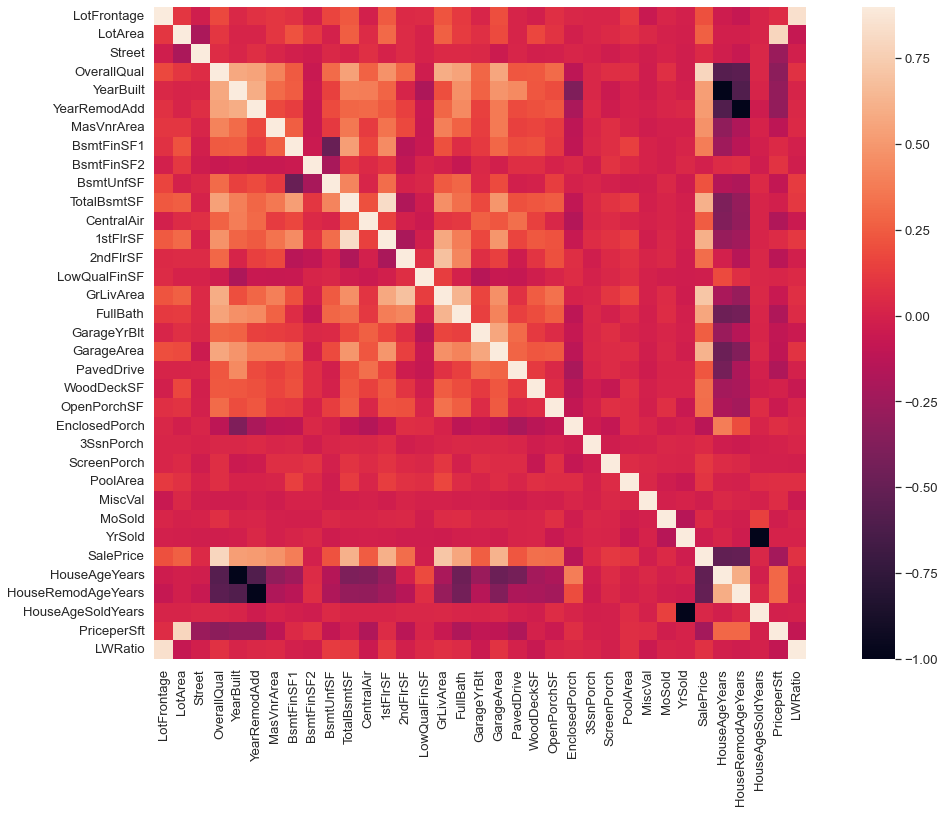

In [26]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(20,12))
sns.heatmap(corrmat, vmax=0.9, square=True)

### Observation :
  Following columns are highly corelated with SalePrice.
  
    1. LotFrontage
    2. YearBuilt
    3. Year Remod Add
    4. MasVnrArea
    5. BsmtFinSF1
    6. TotalBsmtSF
    7. 1stFlrSF
    8. GrLivArea
    9. GarageArea
    10. OverallQual
    11. FullBath

### Let's try to find pattern between above derived numerical variables

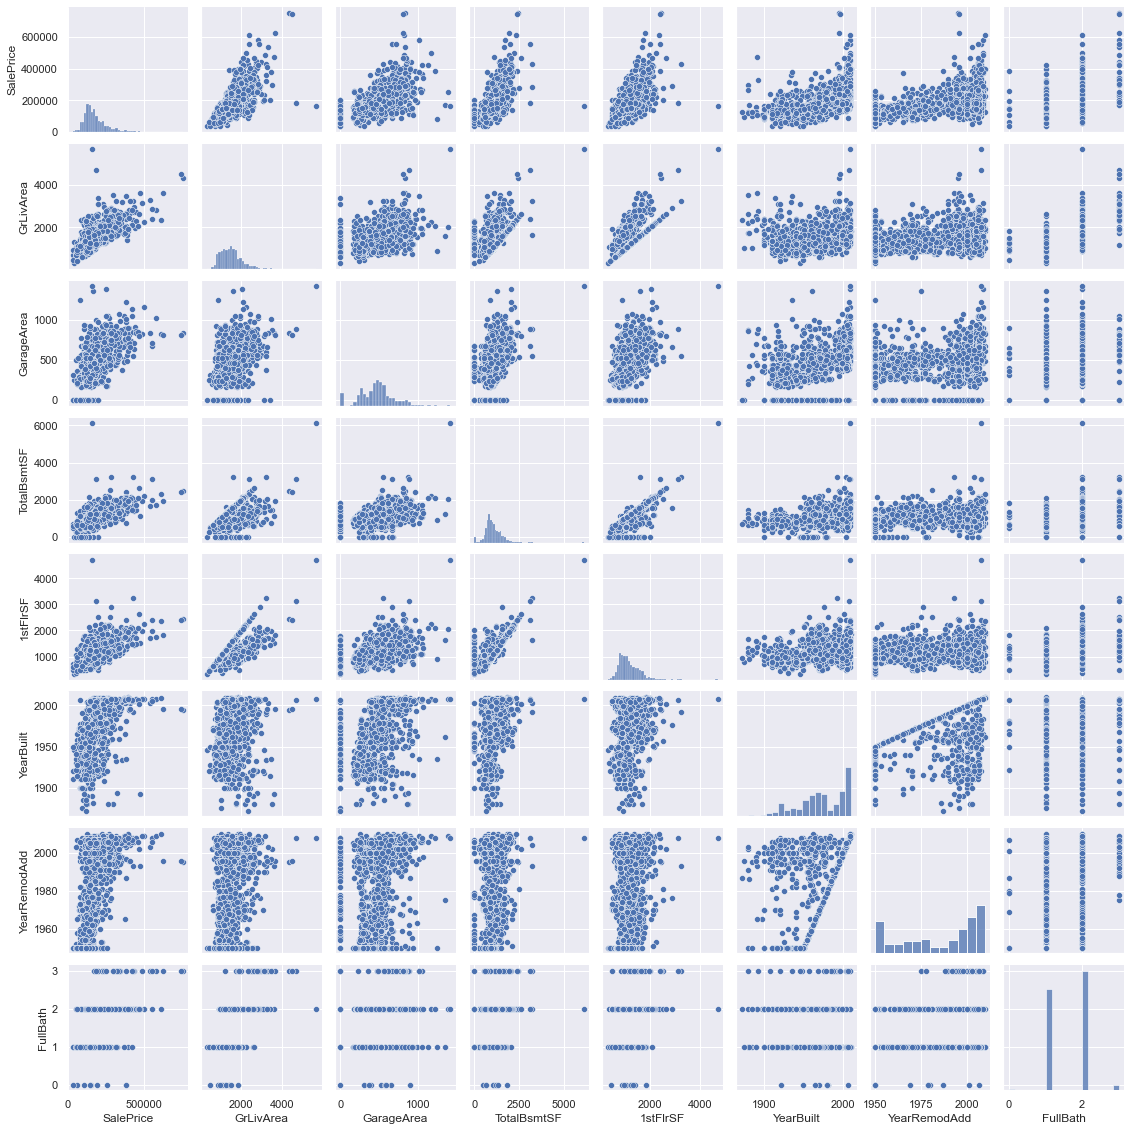

In [27]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt','YearRemodAdd','FullBath']
sns.pairplot(df[cols],height = 2)
plt.show()

#### Categorical Column Analysis

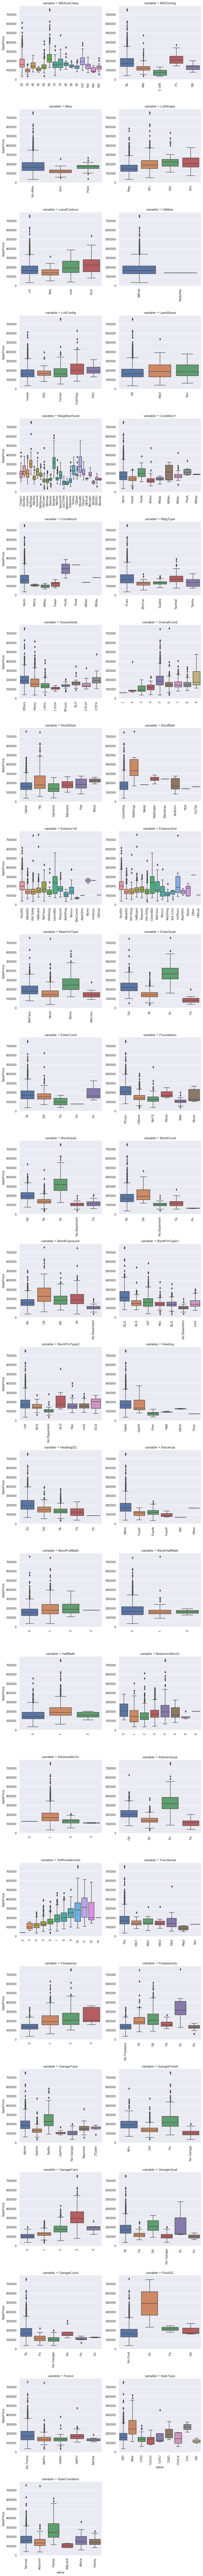

In [28]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=df_categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

### EDA Conclusion:
  1. Most variables correlate with targetVariable.
  2. Target variable has outliers.
  3. Variables that highly influence targetVariable are :
      - Neighbourhood
      - Exterior Quality
      - Kitchen Quality
      - Pool Quality
      - Basement Quality

### Linear Regression

In [29]:
## 
# convert categorical col values into dummies
df_categorical_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_dummies.head()



,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
# Drop original categorical columns

df = df.drop(list(df_categorical.columns), axis=1)

# Add dummy column created for categorical columns to original dataset
df = pd.concat([df,df_categorical_dummies], axis=1)


In [31]:
df.head()

,LotFrontage,LotArea,Street,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,1,7,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1,6,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,7,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,7,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,8,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


### Train Test Split

In [32]:
## create train and test data
df_train, df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [33]:
# Prepare X and y

# feature variable to X and remove target Variable

X = df.drop(['SalePrice'], axis = 1)

# target variable goes to y

y = df['SalePrice']

In [34]:

## prepare x_train and y_train 

y_train = np.log(df_train.pop("SalePrice"))
X_train = df_train

y_test= np.log(df_test.pop("SalePrice"))
X_test = df_test


In [35]:
numeric_cols=X_train.select_dtypes(include=['int64','float64']).columns
numeric_cols

Index(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'HouseAgeYears', 'HouseRemodAgeYears', 'HouseAgeSoldYears',
       'PriceperSft', 'LWRatio'],
      dtype='object')

In [36]:
## Scale using StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Build Model

In [37]:
## Create linear regression model
reg = LinearRegression()
linearModel = reg.fit(X_train,y_train)

In [38]:
rfe = RFE(linearModel,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [39]:

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [40]:
# alphas to tune
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,1.0 ,2.0,3,0,4.0, 5.0, 7.0, 10.0, 13.0, 15.0, 20]}

ridge = Ridge()

# cross validation

folds  = KFold(n_splits=5,shuffle=True,random_state=42)

ridgeModelCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeModelCV.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 1.0,
                                   2.0, 3, 0, 4.0, 5.0, 7.0, 10.0, 13.0, 15.0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
## best params
ridgeModelCV.best_params_

{'alpha': 7.0}

In [42]:
## best score
ridgeModelCV.best_score_

-0.07729118296568382

In [43]:
cvRresult = pd.DataFrame(ridgeModelCV.cv_results_)
cvRresult = cvRresult[cvRresult['param_alpha']<=100]
cvRresult['param_alpha'] = cvRresult['param_alpha'].astype('int32')
cvRresult.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007588,0.001750,0.002950,0.000669,0,{'alpha': 0.0001},-0.076416,-0.080651,-0.089755,-0.087401,...,-0.084780,0.005340,15,-0.046258,-0.043751,-0.045271,-0.043826,-0.045077,-0.044837,0.000945
1,0.006828,0.000503,0.002715,0.000115,0,{'alpha': 0.0005},-0.076397,-0.080604,-0.089571,-0.087191,...,-0.084711,0.005321,14,-0.046263,-0.043756,-0.045278,-0.043852,-0.045090,-0.044848,0.000941
2,0.006700,0.000410,0.002631,0.000054,0,{'alpha': 0.001},-0.076374,-0.080546,-0.089420,-0.087057,...,-0.084649,0.005309,13,-0.046269,-0.043761,-0.045285,-0.043875,-0.045103,-0.044859,0.000938
3,0.008719,0.003829,0.002812,0.000375,0,{'alpha': 0.005},-0.076215,-0.080122,-0.088856,-0.086607,...,-0.084309,0.005264,11,-0.046319,-0.043808,-0.045347,-0.044001,-0.045164,-0.044928,0.000926
4,0.006478,0.000025,0.002696,0.000028,0,{'alpha': 0.003},-0.076290,-0.080326,-0.089081,-0.086788,...,-0.084465,0.005283,12,-0.046294,-0.043785,-0.045314,-0.043945,-0.045138,-0.044895,0.000930


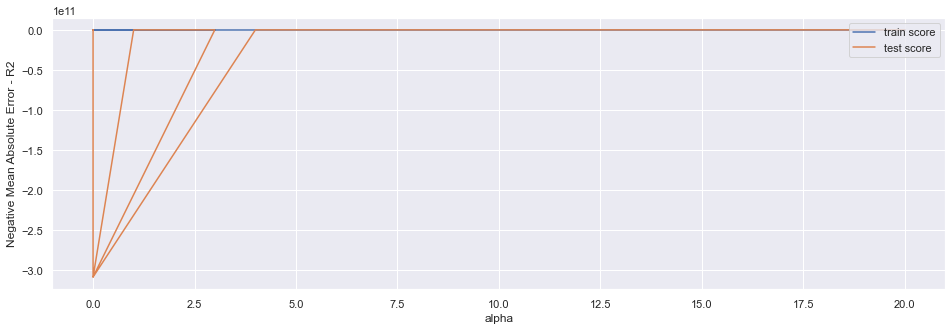

In [44]:


plt.figure(figsize=(16,5))
plt.plot(cvRresult['param_alpha'],cvRresult['mean_train_score'])
plt.plot(cvRresult['param_alpha'],cvRresult['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error - R2')
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

In [45]:

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [46]:
from sklearn.metrics import r2_score
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9516365979097546

In [47]:

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9522475592077919

#### values under different values of alpha (10, 5,7, 1, 0.01, 0.03, 0.05)

In [48]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9567503439426184

In [49]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9613215451561632

In [50]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9603491005283145

In [51]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9677032952286685

In [52]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9587392145056494

In [53]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9648926420324486

In [54]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9664072730517723

In [55]:
alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9761572066074561

#### Observation: We are getting good r2 score with ridge regression

### Lasso regression

In [56]:
lasso = Lasso()
#params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}

params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003,0,1.0 ,2.0,3,0,4.0, 5.0, 7.0, 10.0, 13.0, 15.0, 20]}

# cross validation
lassoModelCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoModelCV.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.003, 0, 1.0,
                                   2.0, 3, 0, 4.0, 5.0, 7.0, 10.0, 13.0, 15.0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
lassoCVResults = pd.DataFrame(lassoModelCV.cv_results_)
lassoCVResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.064017,0.021530,0.002792,0.000176,0.0001,{'alpha': 0.0001},-0.068532,-0.068997,-0.078391,-0.073246,...,-0.073959,0.004873,1,-0.051080,-0.048486,-0.049848,-0.050244,-0.049706,-0.049873,0.000842
1,0.029780,0.003675,0.002690,0.000067,0.0005,{'alpha': 0.0005},-0.074154,-0.069672,-0.083284,-0.073163,...,-0.075416,0.004550,2,-0.060429,-0.056295,-0.059709,-0.058745,-0.056449,-0.058325,0.001683
2,0.015581,0.001782,0.002613,0.000021,0.001,{'alpha': 0.001},-0.077153,-0.070887,-0.086702,-0.074277,...,-0.077184,0.005268,3,-0.066536,-0.060891,-0.065358,-0.065853,-0.061858,-0.064099,0.002276
3,0.007938,0.000320,0.002581,0.000060,0.005,{'alpha': 0.005},-0.086481,-0.076953,-0.095234,-0.080280,...,-0.086297,0.006962,7,-0.081287,-0.076799,-0.080461,-0.082158,-0.078961,-0.079933,0.001888
4,0.009083,0.000448,0.002568,0.000031,0.003,{'alpha': 0.003},-0.083147,-0.074182,-0.094524,-0.076896,...,-0.082811,0.007113,4,-0.076325,-0.070812,-0.075890,-0.076495,-0.073327,-0.074570,0.002200


In [58]:
lassoModelCV.best_params_

{'alpha': 0.0001}

In [59]:
lassoModelCV.best_score_

-0.0739593530505357

In [60]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [61]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9425196018414628

In [62]:
#Predict R2 for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9242871049079537


In [63]:
mean_squared_error(y_test, y_test_pred)


0.01245780858111829

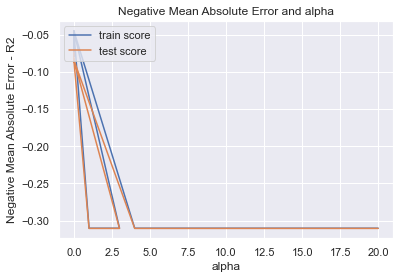

In [64]:
# plotting mean test and train scoes with alpha 
lassoCVResults['param_alpha'] = lassoCVResults['param_alpha'].astype('float32')

# plotting
plt.plot(lassoCVResults['param_alpha'], lassoCVResults['mean_train_score'])
plt.plot(lassoCVResults['param_alpha'], lassoCVResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error - R2')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
ridgeModelCV.best_params_

{'alpha': 7.0}

In [66]:
ridge = Ridge(alpha = 7)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9587392145056494
0.9281681482197839


In [67]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [68]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.9425196018414628
0.9242871049079537



### Below features are best explaining DataSet

In [69]:

ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feature,Coef
0,LotFrontage,11.870738
2,Street,0.177536
83,Neighborhood_OldTown,0.074421
73,Neighborhood_Edwards,0.074021
58,LandContour_Low,0.064172
88,Neighborhood_StoneBr,0.058106
89,Neighborhood_Timber,0.055996
16,FullBath,0.053482
51,MSZoning_RM,0.053259
49,MSZoning_RH,0.050799
